In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [5]:
df[df['age'] > 40]['result'].value_counts()

0    542
1    103
Name: result, dtype: int64

In [6]:
df['result'].value_counts()

0    755
1    108
Name: result, dtype: int64

In [7]:
df.pivot_table('result', index='gender',aggfunc='sum')

,result
gender,
0,34
1,69
2,5


<AxesSubplot:>

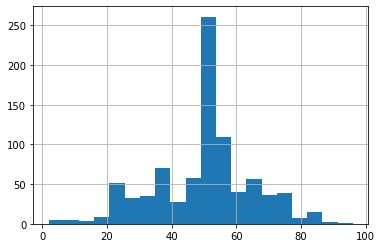

In [8]:
df['age'].hist(bins=20)

In [9]:
avg_age_by_class = df.pivot_table('age', index='result')

<AxesSubplot:title={'center':'Mean Age per Class'}, xlabel='result'>

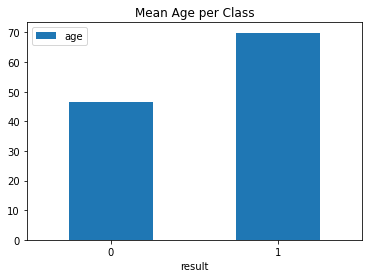

In [10]:
avg_age_by_class.plot(kind='bar', title= 'Mean Age per Class', rot=0)

In [11]:
rare_symptom1 = [20,4,21,24,22,18,9,1,3,5,7,8,12,10,11,23,13,15,16,17,19,0]
df = df.drop(df[df['symptom1'].isin(rare_symptom1)].index)

In [12]:
rare_symptom2 = [27,5,12,24,13,28,25,3,8,9,2,10,11,4,16,14,15,30,18,20,21,22,23,26,29,0]
df = df.drop(df[df['symptom2'].isin(rare_symptom2)].index)

In [13]:
df.pivot_table('result', index='symptom1', columns='symptom2',aggfunc='sum')

symptom2,7,17,31
symptom1,,,
2,NaN,3.0,2.0
6,10.0,2.0,7.0
14,NaN,NaN,66.0


In [14]:
df.pivot_table('result', index='symptom2', columns='symptom3',aggfunc='sum')

symptom3,3,6,8,13,14,15,16,19
symptom2,,,,,,,,
7,NaN,0.0,2.0,1.0,0.0,0.0,3.0,4.0
17,1.0,NaN,NaN,NaN,2.0,0.0,NaN,2.0
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0
